In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, r2_score
from sklearn.svm import SVR
import matplotlib.pyplot as plt
from math import sqrt

In [ ]:
data_rnn = pd.read_csv("https://raw.githubusercontent.com/t0ccata/final-project-ml/main/archive/daily/AALI.csv")
data_rnn['timestamp'] = pd.to_datetime(data_rnn['timestamp'])
data_rnn.set_index('timestamp', inplace=True)
data_rnn.head()

,open,low,high,close,volume
timestamp,,,,,
2001-04-16,524,524,547,547,342131
2001-04-17,547,524,571,524,345804
2001-04-18,547,524,547,524,230361
2001-04-19,524,500,524,500,457574
2001-04-20,476,452,476,452,228262


In [ ]:
data_rnn.isna().sum()

open      0
low       0
high      0
close     0
volume    0
dtype: int64

In [ ]:
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data_rnn)

In [ ]:
def create_sequences(data, seq_length):
    sequences, targets = [], []
    for i in range(len(data) - seq_length):
        sequences.append(data[i:i + seq_length])
        targets.append(data[i + seq_length, 3])
    return np.array(sequences), np.array(targets)

In [ ]:
seq_length = 60
sequences, targets = create_sequences(scaled_data, seq_length)

In [ ]:
sequences = sequences.reshape(sequences.shape[0], -1)

In [ ]:
train_size = int(len(sequences) * 0.8)
X_train, X_test = sequences[:train_size], sequences[train_size:]
y_train, y_test = targets[:train_size], targets[train_size:]

In [ ]:
model = SVR(kernel='rbf', C=1e3, gamma=0.1)
model.fit(X_train, y_train)

SVR(C=1000.0, gamma=0.1)

In [ ]:
train_predictions = model.predict(X_train)
test_predictions = model.predict(X_test)

In [ ]:
combined_train_test_predictions = np.concatenate((train_predictions, test_predictions), axis=0)
combined_train_test_actual = np.concatenate((y_train, y_test), axis=0)

In [ ]:
mse_normalized = mean_squared_error(combined_train_test_actual, combined_train_test_predictions)
mape_normalized = mean_absolute_percentage_error(combined_train_test_actual, combined_train_test_predictions)
r2_normalized = r2_score(combined_train_test_actual, combined_train_test_predictions)

print(f'Normalized Data Metrics:')
print(f'MSE: {mse_normalized}')
print(f'MAPE: {mape_normalized}')
print(f'R2 Score: {r2_normalized}')

Normalized Data Metrics:
MSE: 0.0015538409910992115
MAPE: 0.41427059563720914
R2 Score: 0.9719654658129658


In [ ]:
train_predictions_scaled = np.zeros((train_predictions.shape[0], 5))
train_predictions_scaled[:, 3] = train_predictions
train_predictions = scaler.inverse_transform(train_predictions_scaled)[:, 3]

In [ ]:
test_predictions_scaled = np.zeros((test_predictions.shape[0], 5))
test_predictions_scaled[:, 3] = test_predictions
test_predictions = scaler.inverse_transform(test_predictions_scaled)[:, 3]

In [ ]:
y_train_scaled = np.zeros((y_train.shape[0], 5))
y_train_scaled[:, 3] = y_train
y_train_actual = scaler.inverse_transform(y_train_scaled)[:, 3]

In [ ]:
y_test_scaled = np.zeros((y_test.shape[0], 5))
y_test_scaled[:, 3] = y_test
y_test_actual = scaler.inverse_transform(y_test_scaled)[:, 3]


In [ ]:
mse_denormalized = mean_squared_error(y_test_actual, test_predictions)
mape_denormalized = mean_absolute_percentage_error(y_test_actual, test_predictions)
r2_denormalized = r2_score(y_test_actual, test_predictions)
print(f'Denormalized Data Metrics:')
print(f'MSE: {mse_denormalized}')
print(f'MAPE: {mape_denormalized}')
print(f'R2 Score: {r2_denormalized}')

Denormalized Data Metrics:
MSE: 1016580.3148162684
MAPE: 0.09123470427895854
R2 Score: 0.6956868923035813


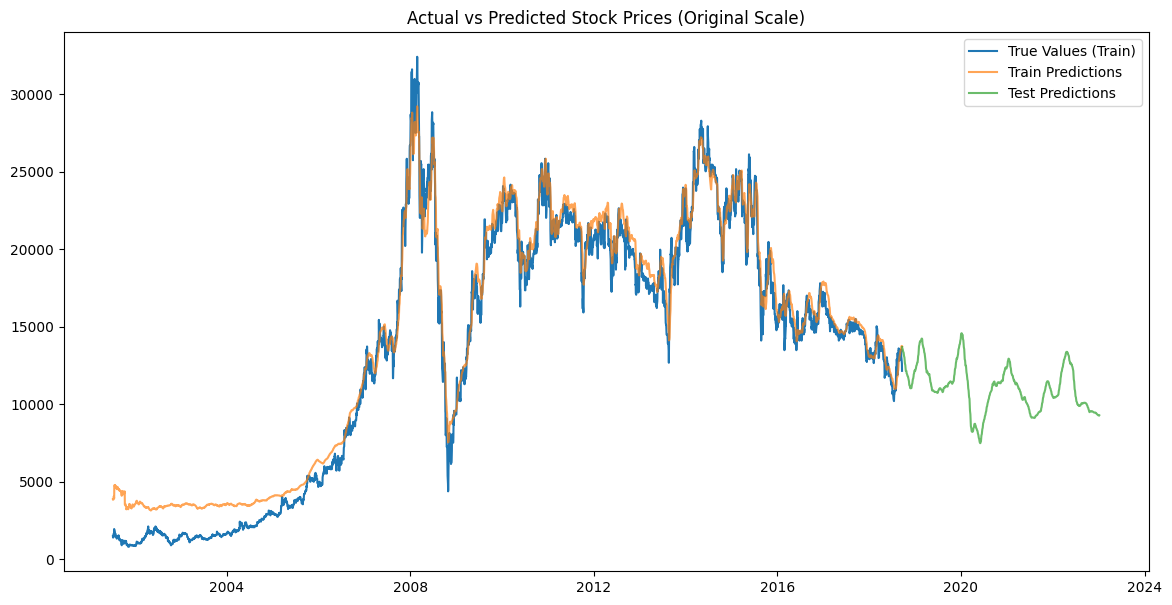

In [ ]:
plt.figure(figsize=(14, 7))
plt.plot(data_rnn.index[seq_length:seq_length + len(y_train_actual)], y_train_actual, label='True Values (Train)')
plt.plot(data_rnn.index[seq_length:seq_length + len(train_predictions)], train_predictions, label='Train Predictions', alpha=0.7)
plt.plot(data_rnn.index[seq_length + len(train_predictions):seq_length + len(train_predictions) + len(test_predictions)], test_predictions, label='Test Predictions', alpha=0.7)
plt.legend()
plt.title('Actual vs Predicted Stock Prices (Original Scale)')
plt.show()

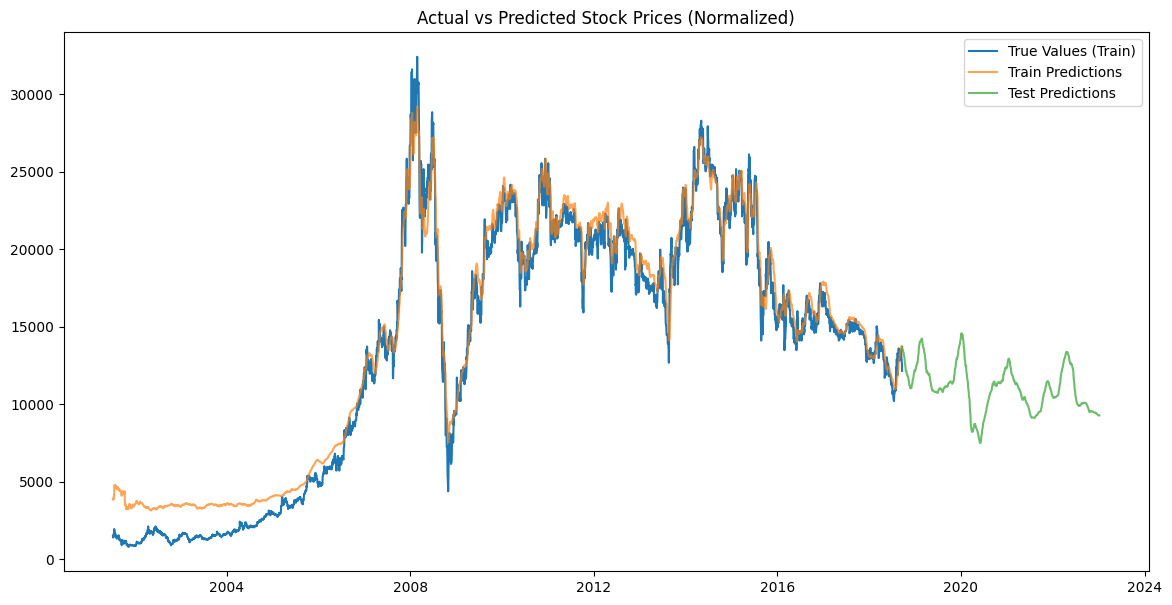

In [ ]:
plt.figure(figsize=(14, 7))
plt.plot(data_rnn.index[seq_length:seq_length + len(y_train_actual)], y_train_actual, label='True Values (Train)')
plt.plot(data_rnn.index[seq_length:seq_length + len(train_predictions)], train_predictions, label='Train Predictions', alpha=0.7)
plt.plot(data_rnn.index[seq_length + len(train_predictions):seq_length + len(train_predictions) + len(test_predictions)], test_predictions, label='Test Predictions', alpha=0.7)
plt.legend()
plt.title('Actual vs Predicted Stock Prices (Normalized)')
plt.show()